In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [7]:
# Load the dataset (assuming you have a CSV file with 'datetime' and 'temperature' columns)
dataset = pd.read_csv('../datasets/GlobalLandTemperaturesByCountry.csv')

# Filtering data for Nordic countries, Finland and Sweden 
nordic_temperature = pd.concat([
    dataset[dataset['Country'] == 'Norway'], 
    dataset[dataset['Country'] == 'Finland'], 
    dataset[dataset['Country'] == 'Sweden']
])
# norway_data = dataset[dataset['Country'] == 'Norway']

# find median of temperature
median_temperature = nordic_temperature['AverageTemperature'].median()

# fill missing values with median
nordic_temperature['AverageTemperature'] = nordic_temperature['AverageTemperature'].fillna(median_temperature)

# Convert the 'datetime' column to datetime format
nordic_temperature['dt'] = pd.to_datetime(nordic_temperature['dt'], format='%Y-%m-%d')

# Extract features from the datetime column
nordic_temperature['timestamp'] = nordic_temperature['dt'].astype(int) // 10**9

In [8]:
X = nordic_temperature[['timestamp']]
y = nordic_temperature['AverageTemperature']
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X.values, y) 

LinearRegression()

In [9]:
new_datetime = pd.to_datetime('1850-06-30', format='%Y-%m-%d')
new_timestamp = new_datetime.timestamp()
new_temperature = model.predict([[new_timestamp]])

new_datetime_2 = pd.to_datetime('2050-06-30', format='%Y-%m-%d')
new_timestamp_2 = new_datetime_2.timestamp()
new_temperature_2 = model.predict([[new_timestamp_2]])

print('date:', new_datetime ,'Predicted temperature:', new_temperature)
print('date:', new_datetime_2 ,'Predicted temperature:', new_temperature_2)

date: 1850-06-30 00:00:00 Predicted temperature: [1.09283466]
date: 2050-06-30 00:00:00 Predicted temperature: [2.0308723]


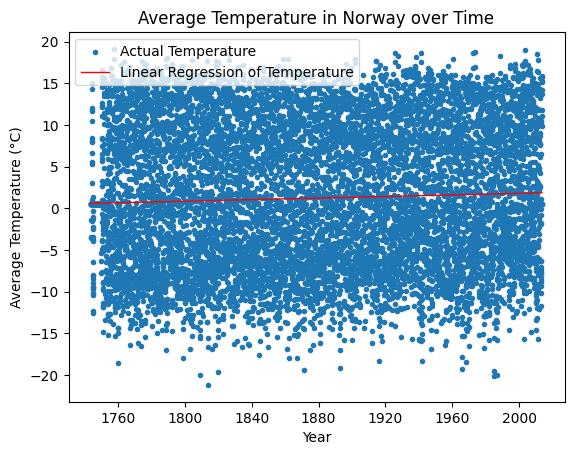

In [10]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature in Norway over Time')
plt.scatter(nordic_temperature['dt'], nordic_temperature['AverageTemperature'], marker='.', label='Actual Temperature')
plt.plot(nordic_temperature['dt'], model.predict(X.values), color='red', linewidth=1, label='Linear Regression of Temperature')

# Setting x-axis ticks for every 50 years
# x_ticks = np.arange(pd.to_datetime(min(norway_data['timestamp']), unit='s').year, 
#                       pd.to_datetime(max(norway_data['timestamp']), unit='s').year, 100)

# x_ticks = np.linspace(pd.to_datetime(min(norway_data['timestamp']), unit='s').year, 
#                       pd.to_datetime(max(norway_data['timestamp']), unit='s').year, num=1
#                       )
# print(x_ticks)
# plt.xticks(x_ticks)

plt.savefig('../output-results/norwayAvgTemp.png')
plt.legend(loc=2)

plt.show()